In [78]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

%run my_models.ipynb

In [79]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.shape, df_test.shape

((700, 2), (300, 2))

In [80]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


(None, None)

Only 1 row for 700 instances has nan, so we can easily drop it.

In [81]:
df_train = df_train.dropna()

In [82]:
X = df_train['x'].to_numpy()
y = df_train['y'].to_numpy().ravel()
X_test = df_test['x'].to_numpy()
y_test = df_test['y'].to_numpy()

<h2> With standarization <h2>

In [83]:
std_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

In [84]:
X = std_pipeline.fit_transform(X.reshape(-1, 1))
X_test = std_pipeline.transform(X_test.reshape(-1, 1))

<h2> Normal Equation </h2>

In [85]:
y_pred, mse = linear_regression_NE(X, y, X_test, y_pred)
mse

9.432922192039326

<h2> SVD </h2>

In [86]:
# https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/linear_model/_base.py#L529
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y)
y_pred = lin_reg.predict(X_test.reshape(-1, 1))
mean_squared_error(y_test, y_pred)

9.432922192039317

<h3> Implementation </h3>

In [87]:
y_pred, mse = linear_regression_SVD(X, y, X_test, y_pred)
mse

9.432922192039321

<h2> Batch Gradient Descent </h2>

In [88]:
theta, theta_path_BGD, y_pred, mse = linear_regression_BGD(X, y, X_test, y_pred, [0,0])
mse

theta:  [0.99879738 0.57905666]
theta:  [17.2664195  10.01027374]
theta:  [28.12681371 16.30662944]
theta:  [35.37729945 20.5101267 ]
theta:  [40.21778154 23.31641498]
theta:  [43.44932597 25.18991541]
theta:  [45.60673079 26.44067923]
theta:  [47.04703144 27.27569913]
theta:  [48.00858764 27.83316507]
theta:  [48.65053023 28.20533378]
theta:  [49.07909621 28.45379657]
theta:  [49.36521028 28.61967231]
theta:  [49.55622232 28.73041228]
theta:  [49.68374347 28.80434317]
theta:  [49.76887761 28.85370001]
theta:  [49.82571384 28.88665104]
theta:  [49.86365816 28.90864941]
theta:  [49.88899009 28.92333569]
theta:  [49.90590189 28.93314037]
theta:  [49.91719235 28.93968606]
theta:  [49.92472994 28.94405601]
theta:  [49.9297621  28.94697342]
theta:  [49.93312161 28.94892111]
theta:  [49.93536445 28.9502214 ]


9.437686534021807

<h2> Stochastic Gradient Descent </h2>

In [89]:
# https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/linear_model/_stochastic_gradient.py#L1694
lin_reg = SGDRegressor()
lin_reg.fit(X.reshape(-1, 1), y)
y_pred = lin_reg.predict(X_test.reshape(-1, 1))
mean_squared_error(y_test, y_pred)

9.44185964354061

<h3> Implementation </h3>

In [90]:
theta, theta_path_SGD, y_pred, mse = linear_regression_BGD(X, y, X_test, y_pred, [0,0])
mse

theta:  [0.99879738 0.57905666]
theta:  [17.2664195  10.01027374]
theta:  [28.12681371 16.30662944]
theta:  [35.37729945 20.5101267 ]
theta:  [40.21778154 23.31641498]
theta:  [43.44932597 25.18991541]
theta:  [45.60673079 26.44067923]
theta:  [47.04703144 27.27569913]
theta:  [48.00858764 27.83316507]
theta:  [48.65053023 28.20533378]
theta:  [49.07909621 28.45379657]
theta:  [49.36521028 28.61967231]
theta:  [49.55622232 28.73041228]
theta:  [49.68374347 28.80434317]
theta:  [49.76887761 28.85370001]
theta:  [49.82571384 28.88665104]
theta:  [49.86365816 28.90864941]
theta:  [49.88899009 28.92333569]
theta:  [49.90590189 28.93314037]
theta:  [49.91719235 28.93968606]
theta:  [49.92472994 28.94405601]
theta:  [49.9297621  28.94697342]
theta:  [49.93312161 28.94892111]
theta:  [49.93536445 28.9502214 ]


9.437686534021807

<h2> Mini-batch Gradient Descent </h2>

In [91]:
theta, theta_path_MbGD, y_pred, mse = linear_regression_MbGD(X, y, X_test, y_pred, [0,0], batch_size = int(0.1 * X.shape[0]), message_frequency=10000)
mse

theta:  [9.45521541 5.03608596]
theta:  [49.96659284 28.86624027]
theta:  [49.89880197 28.97338698]


9.39862081285147

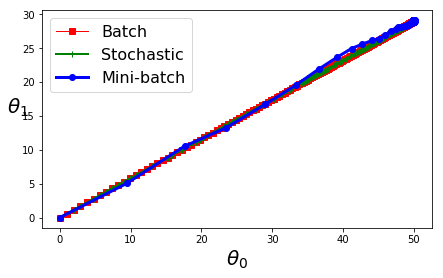

In [92]:
linear_regression_compare_paths([theta_path_BGD, theta_path_SGD, theta_path_MbGD], ['Batch', 'Stochastic', 'Mini-batch'])

<h2> Without standarization </h2>

...